In [1]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
args = {
    "parametrization": pp.parametrization.ionization.BetheBlochRossi(pp.EnergyCutSettings(500,1,False)),
    "particle_def": pp.particle.MuMinusDef(),
    "target": pp.medium.Ice(),
    "interpolate": False
}

# Continuous Losses

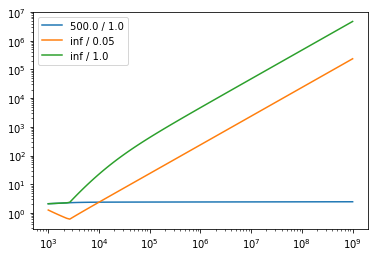

In [6]:
energies = np.geomspace(1e3, 1e9, 100)
cuts = [
    pp.EnergyCutSettings(500, 1, False), 
    pp.EnergyCutSettings(np.Infinity, 0.05, False),
    pp.EnergyCutSettings(np.Infinity, 1, False)
]

for cut in cuts:
    cross = pp.crosssection.make_crosssection(cuts = cut, **args)
    plt.plot(energies, cross.calculate_dEdx(energies), label=f"{cut.ecut} / {cut.vcut}")
plt.xscale("log")
plt.yscale("log")
plt.legend()

# Stochastic Losses

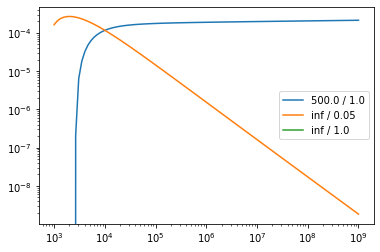

In [7]:
N_SAMPLE = 100
dNdx = np.empty(N_SAMPLE)
energies = np.geomspace(1e3, 1e9, N_SAMPLE)
for cut in cuts:
    cross = pp.crosssection.make_crosssection(cuts = cut,**args)
    for i in range(N_SAMPLE):
        rates = cross.calculate_dNdx(energies[i])
        dNdx[i] = sum(rates.values())
    plt.plot(energies, dNdx, label=f"{cut.ecut} / {cut.vcut}")
plt.xscale("log")
plt.yscale("log")
plt.legend()

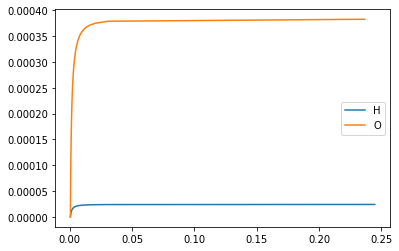

In [5]:
N_SAMPLES = 100
energy = 1e6
cross = pp.crosssection.make_crosssection(cuts = pp.EnergyCutSettings(500, 1, False),**args)
rates = cross.calculate_dNdx(energy)
for c, r in rates.items():
    sampled_rate = np.linspace(0, r, N_SAMPLES)
    loss = np.empty(N_SAMPLES)
    for i in range(N_SAMPLES):
        loss[i] = cross.calculate_stochastic_loss(c, energy, sampled_rate[i])
    plt.plot(loss, sampled_rate, label=f"{c.name}")
# plt.yscale("log")
plt.legend()

# Standard CrossSections

In [6]:
args = {
    "particle_def": pp.particle.MuMinusDef(),
    "target": pp.medium.Ice(),
    "interpolate": False,
    "cuts": pp.EnergyCutSettings(500, 1, False)
}
crosssections = pp.crosssection.make_std_crosssection(**args)

print(f"The particle {args['particle_def'].name} has the standard cross sections for the interactions of type:")
for c in crosssections:
    print(f"\t- {c.type.name}")

The particle MuMinus has the standard cross sections for the interactions of type:
	- brems
	- epair
	- ioniz
	- photonuclear


Further interactions can be simply added by appending them to the list.

In [7]:
mupair = pp.parametrization.mupairproduction.KelnerKokoulinPetrukhin()
crosssections.append(pp.crosssection.make_crosssection(parametrization=mupair, **args))
print(f"The particle {args['particle_def'].name} has the standard cross sections for the interactions of type:")
for c in crosssections:
    print(f"\t- {c.type.name}")

The particle MuMinus has the standard cross sections for the interactions of type:
	- brems
	- epair
	- ioniz
	- photonuclear
	- mupair
